In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_excel (r'./Matric_Couverture3_evolution.xlsx', index_col=None, header=None)
data1

,0,1,2,3,4,5,6,7,8,9,...,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157
0,Evolution:,0,0,2,0,0,3,0,0,0,...,0,0,2,1,0,1,0,0,1,0
1,NaN,le système affiche les boutons des réseaux soc...,"sur le logo depuis une page intérieure, le sys...","Sur le logo depuis la page daccueil, le systè...",Si lutilisateur clique sur le bouton daccess...,Un clic sur un bouton de réseaux sociaux perme...,Le système affiche :,"Au clic sur la langue sélectionnée, le système...","Si la langue sélectionnée est français, le sys...","Si la langue sélectionnée est anglais, le syst...",...,Déplacement du doigt de gauche à droite : le s...,Déplacement du doigt de droite à gauche : le s...,Au clic sur un élément du parcours,Le libellé Aller à luvre suivante,"Au clic sur la croix, on réinitialise laffich...",Au clic sur le libellé Aller à luvre suivant...,"Les blocs de texte sont affichés à la suite, s...",Les ronds ne sont pas cliquables,"Au clic sur le visuel du parcours, le système ...",Libellé Champ de partage twitter + Titre + ...
2,4.1.1\tCU001-001 Afficher le header,X,X,X,X,X,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.1.2\tCU001-002 Afficher le bouton de langue,NaN,NaN,NaN,NaN,NaN,X,X,X,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.1.3\tCU001-0021 Afficher la page Langue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.1.4\tCU001-0022 Contribuer la page langue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.1.5\tCU001-003 Afficher le fil dariane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.1.6\tCU001-004 Afficher le bouton de partage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4.1.7\tCU001-005 Afficher le menu de navigation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4.1.8\tCU001-006 Modifier le menu de navigation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data = pd.DataFrame(data1)
data

,0,1,2,3,4,5,6,7,8,9,...,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157
0,Evolution:,0,0,2,0,0,3,0,0,0,...,0,0,2,1,0,1,0,0,1,0
1,NaN,le système affiche les boutons des réseaux soc...,"sur le logo depuis une page intérieure, le sys...","Sur le logo depuis la page daccueil, le systè...",Si lutilisateur clique sur le bouton daccess...,Un clic sur un bouton de réseaux sociaux perme...,Le système affiche :,"Au clic sur la langue sélectionnée, le système...","Si la langue sélectionnée est français, le sys...","Si la langue sélectionnée est anglais, le syst...",...,Déplacement du doigt de gauche à droite : le s...,Déplacement du doigt de droite à gauche : le s...,Au clic sur un élément du parcours,Le libellé Aller à luvre suivante,"Au clic sur la croix, on réinitialise laffich...",Au clic sur le libellé Aller à luvre suivant...,"Les blocs de texte sont affichés à la suite, s...",Les ronds ne sont pas cliquables,"Au clic sur le visuel du parcours, le système ...",Libellé Champ de partage twitter + Titre + ...
2,4.1.1\tCU001-001 Afficher le header,X,X,X,X,X,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.1.2\tCU001-002 Afficher le bouton de langue,NaN,NaN,NaN,NaN,NaN,X,X,X,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.1.3\tCU001-0021 Afficher la page Langue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.1.4\tCU001-0022 Contribuer la page langue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.1.5\tCU001-003 Afficher le fil dariane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.1.6\tCU001-004 Afficher le bouton de partage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4.1.7\tCU001-005 Afficher le menu de navigation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4.1.8\tCU001-006 Modifier le menu de navigation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data = data.iloc[0:2]
data

,0,1,2,3,4,5,6,7,8,9,...,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157
0,Evolution:,0,0,2,0,0,3,0,0,0,...,0,0,2,1,0,1,0,0,1,0
1,NaN,le système affiche les boutons des réseaux soc...,"sur le logo depuis une page intérieure, le sys...","Sur le logo depuis la page daccueil, le systè...",Si lutilisateur clique sur le bouton daccess...,Un clic sur un bouton de réseaux sociaux perme...,Le système affiche :,"Au clic sur la langue sélectionnée, le système...","Si la langue sélectionnée est français, le sys...","Si la langue sélectionnée est anglais, le syst...",...,Déplacement du doigt de gauche à droite : le s...,Déplacement du doigt de droite à gauche : le s...,Au clic sur un élément du parcours,Le libellé Aller à luvre suivante,"Au clic sur la croix, on réinitialise laffich...",Au clic sur le libellé Aller à luvre suivant...,"Les blocs de texte sont affichés à la suite, s...",Les ronds ne sont pas cliquables,"Au clic sur le visuel du parcours, le système ...",Libellé Champ de partage twitter + Titre + ...


In [5]:
data=data.transpose()
data = data[[1, 0]]
data.columns = ["texte", "Evolution"]
data=data.drop(index=0)
data

,texte,Evolution
1,le système affiche les boutons des réseaux soc...,0
2,"sur le logo depuis une page intérieure, le sys...",0
3,"Sur le logo depuis la page daccueil, le systè...",2
4,Si lutilisateur clique sur le bouton daccess...,0
5,Un clic sur un bouton de réseaux sociaux perme...,0
6,Le système affiche :,3
7,"Au clic sur la langue sélectionnée, le système...",0
8,"Si la langue sélectionnée est français, le sys...",0
9,"Si la langue sélectionnée est anglais, le syst...",0
10,"Si la langue sélectionnée est espagnol, le sys...",0


In [6]:
import matplotlib.pyplot as plt 
fig = plt.figure (figsize = (8,6)) 
data.groupby ('Evolution').texte.count (). plot.bar (ylim = 0) 
plt.show ()

<Figure size 800x600 with 1 Axes>

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data["texte"], data["Evolution"].astype('category'), test_size=0.3, random_state=0)

In [8]:
# Extraction des caractéristiques en limitant le nombre de feature à 500
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

vec = TfidfVectorizer(max_features=100, lowercase=True, analyzer='word', stop_words=stopwords.words('french'),ngram_range=(1,4))
vec.fit(X_train.values)
X_train_vec = vec.transform(X_train.values)

In [9]:
vec.fit(X_test.values)
X_test_vec = vec.transform(X_test.values)

In [10]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import SGD

input_dim = X_train_vec.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(200, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

Using TensorFlow backend.


In [11]:
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 804       
Total params: 61,204
Trainable params: 61,204
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X_train_vec, y_train, epochs=40, verbose=2, validation_data=(X_test_vec, y_test), batch_size=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 809 samples, validate on 348 samples
Epoch 1/40





 - 1s - loss: 1.1444 - acc: 0.4697 - val_loss: 1.1101 - val_acc: 0.4483
Epoch 2/40
 - 0s - loss: 1.0610 - acc: 0.5006 - val_loss: 1.1064 - val_acc: 0.4425
Epoch 3/40
 - 0s - loss: 1.0411 - acc: 0.5142 - val_loss: 1.0964 - val_acc: 0.4339
Epoch 4/40
 - 0s - loss: 1.0138 - acc: 0.5266 - val_loss: 1.0974 - val_acc: 0.4483
Epoch 5/40
 - 0s - loss: 0.9826 - acc: 0.5488 - val_loss: 1.1198 - val_acc: 0.4483
Epoch 6/40
 - 0s - loss: 0.9632 - acc: 0.5439 - val_loss: 1.1203 - val_acc: 0.4511
Epoch 7/40
 - 0s - loss: 0.9288 - acc: 0.5624 - val_loss: 1.1069 - val_acc: 0.4511
Epoch 8/40
 - 0s - loss: 0.9010 - acc: 0.5810 - val_loss: 1.1139 - val_acc: 0.4368
Epoch 9/40
 - 0s - loss: 0.8959 - acc: 0.5723 - val_loss: 1.1115 - val_acc: 0.4282
Epoch 10/40
 - 0s - loss: 0.8710 - acc: 0.5958 - val_loss: 1.1349 - val_acc: 0.4454
Epoch 11/40
 - 0s - l

In [13]:
loss, accuracy = model.evaluate(X_train_vec, y_train, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  0.33674136913014285           Accuracy:  0.8702101361176876


In [14]:
loss, accuracy = model.evaluate(X_test_vec, y_test, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  1.813677859032291           Accuracy:  0.4540229895334134


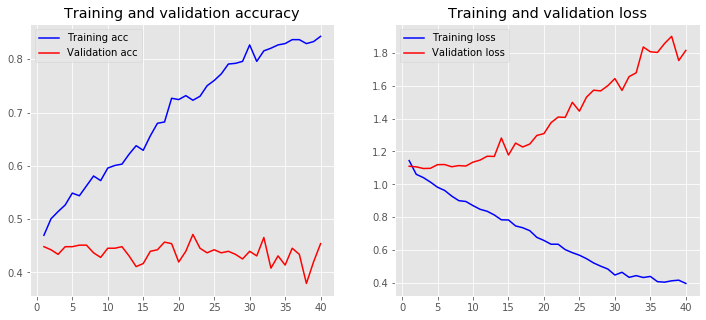

In [15]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
plot_history(history)

## Sur-échantillonnage

In [16]:
from imblearn.over_sampling import RandomOverSampler
# Sur-échantillonnage
ros = RandomOverSampler()
X_ro, y_ro = ros.fit_resample(X_train_vec, y_train)

In [17]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import SGD

input_dim = X_ro.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(350, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(350, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [18]:
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 350)               35350     
_________________________________________________________________
dense_5 (Dense)              (None, 350)               122850    
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 1404      
Total params: 159,604
Trainable params: 159,604
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(X_ro, y_ro, epochs=40, verbose=2, validation_data=(X_test_vec, y_test), batch_size=10)

Train on 1524 samples, validate on 348 samples
Epoch 1/40
 - 1s - loss: 1.2830 - acc: 0.4173 - val_loss: 1.3358 - val_acc: 0.3362
Epoch 2/40
 - 1s - loss: 0.9909 - acc: 0.5564 - val_loss: 1.2533 - val_acc: 0.2931
Epoch 3/40
 - 0s - loss: 0.8289 - acc: 0.6214 - val_loss: 1.2389 - val_acc: 0.3621
Epoch 4/40
 - 0s - loss: 0.7535 - acc: 0.6483 - val_loss: 1.2618 - val_acc: 0.3822
Epoch 5/40
 - 0s - loss: 0.7048 - acc: 0.6765 - val_loss: 1.2297 - val_acc: 0.4224
Epoch 6/40
 - 0s - loss: 0.6571 - acc: 0.7106 - val_loss: 1.2534 - val_acc: 0.3879
Epoch 7/40
 - 1s - loss: 0.6196 - acc: 0.7198 - val_loss: 1.3779 - val_acc: 0.3736
Epoch 8/40
 - 1s - loss: 0.5933 - acc: 0.7310 - val_loss: 1.3195 - val_acc: 0.3908
Epoch 9/40
 - 1s - loss: 0.5563 - acc: 0.7487 - val_loss: 1.3889 - val_acc: 0.3621
Epoch 10/40
 - 0s - loss: 0.5230 - acc: 0.7657 - val_loss: 1.4348 - val_acc: 0.3966
Epoch 11/40
 - 1s - loss: 0.5044 - acc: 0.7684 - val_loss: 1.3973 - val_acc: 0.4109
Epoch 12/40
 - 0s - loss: 0.4829 - acc

In [20]:
loss, accuracy = model.evaluate(X_train_vec, y_train, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  0.28843798537189497           Accuracy:  0.8776266997396872


In [21]:
loss, accuracy = model.evaluate(X_test_vec, y_test, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  2.2234161064542572           Accuracy:  0.3793103458552525


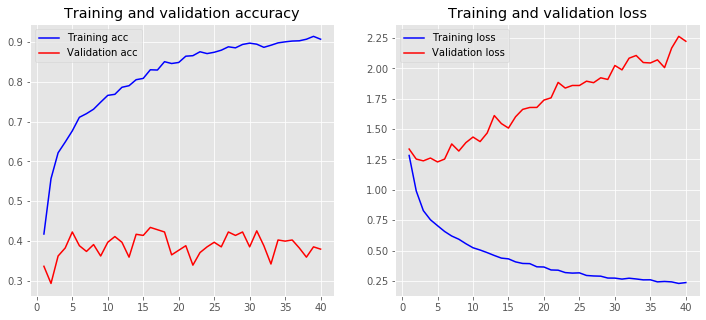

In [22]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
plot_history(history)

In [23]:
print(X_train.values[2])
print(X_train_vec[2])

Le système affiche les accès rapides :
  (0, 75)	0.38598035166816647
  (0, 74)	0.36075421335803404
  (0, 1)	0.36010465380796547
  (0, 0)	0.7688954441121303


In [24]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train.values)

X_train_vec = tokenizer.texts_to_sequences(X_train.values)
X_test_vec = tokenizer.texts_to_sequences(X_test.values)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(X_train.values[2])
print(X_train_vec[2])

Le système affiche les accès rapides :
[1, 4, 5, 6, 214, 391]


In [25]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 50

X_train_vec = pad_sequences(X_train_vec, padding='post', maxlen=maxlen)
X_test_vec = pad_sequences(X_test_vec, padding='post', maxlen=maxlen)

print(X_train_vec[0, :])

[  6 483 389 291   2   3 256   2   3  21   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [26]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

#model.add(layers.Dense(200, input_dim=input_dim, activation='relu'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 50)            54450     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2500)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)               500200    
_________________________________________________________________
dense_8 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 804       
Total params: 595,654
Trainable params: 595,654
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(X_train_vec, y_train, epochs=30, verbose=2, validation_data=(X_test_vec, y_test), batch_size=10)

Train on 809 samples, validate on 348 samples
Epoch 1/30
 - 1s - loss: 1.1402 - acc: 0.4685 - val_loss: 1.1122 - val_acc: 0.4425
Epoch 2/30
 - 1s - loss: 1.0869 - acc: 0.4586 - val_loss: 1.1233 - val_acc: 0.4425
Epoch 3/30
 - 1s - loss: 1.0902 - acc: 0.4722 - val_loss: 1.1061 - val_acc: 0.4511
Epoch 4/30
 - 1s - loss: 1.0819 - acc: 0.4808 - val_loss: 1.1138 - val_acc: 0.4454
Epoch 5/30
 - 1s - loss: 1.0740 - acc: 0.4833 - val_loss: 1.1110 - val_acc: 0.4425
Epoch 6/30
 - 1s - loss: 1.0643 - acc: 0.4870 - val_loss: 1.1038 - val_acc: 0.4540
Epoch 7/30
 - 1s - loss: 1.0455 - acc: 0.5439 - val_loss: 1.1193 - val_acc: 0.4770
Epoch 8/30
 - 1s - loss: 1.0102 - acc: 0.5513 - val_loss: 1.1119 - val_acc: 0.4368
Epoch 9/30
 - 1s - loss: 0.9525 - acc: 0.6131 - val_loss: 1.0998 - val_acc: 0.4626
Epoch 10/30
 - 1s - loss: 0.8439 - acc: 0.6625 - val_loss: 1.1439 - val_acc: 0.4856
Epoch 11/30
 - 1s - loss: 0.7199 - acc: 0.7379 - val_loss: 1.1720 - val_acc: 0.4943
Epoch 12/30
 - 1s - loss: 0.5659 - acc:

In [28]:
loss, accuracy = model.evaluate(X_train_vec, y_train, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  0.02326320677222074           Accuracy:  0.9938195302843016


In [29]:
loss, accuracy = model.evaluate(X_test_vec, y_test, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  2.523680163525987           Accuracy:  0.5258620710208498


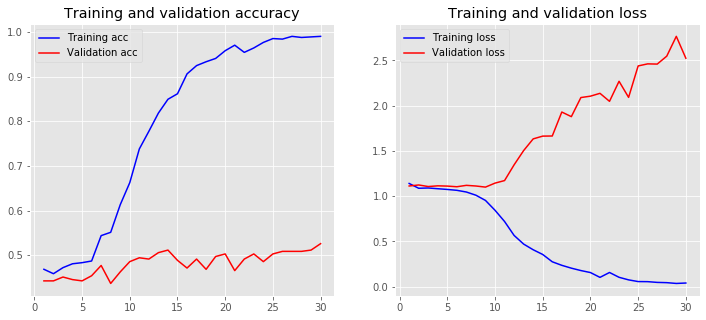

In [30]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
plot_history(history)

In [31]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 50)            54450     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 200)               10200     
_________________________________________________________________
dense_11 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 804       
Total params: 105,654
Trainable params: 105,654
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model.fit(X_train_vec, y_train, epochs=30, verbose=2, validation_data=(X_test_vec, y_test), batch_size=10)

Train on 809 samples, validate on 348 samples
Epoch 1/30
 - 1s - loss: 1.1441 - acc: 0.4710 - val_loss: 1.1099 - val_acc: 0.4425
Epoch 2/30
 - 0s - loss: 1.0853 - acc: 0.4549 - val_loss: 1.1085 - val_acc: 0.4425
Epoch 3/30
 - 0s - loss: 1.0804 - acc: 0.4586 - val_loss: 1.1086 - val_acc: 0.4368
Epoch 4/30
 - 0s - loss: 1.0823 - acc: 0.4549 - val_loss: 1.1108 - val_acc: 0.4425
Epoch 5/30
 - 0s - loss: 1.0779 - acc: 0.4660 - val_loss: 1.1036 - val_acc: 0.4425
Epoch 6/30
 - 0s - loss: 1.0648 - acc: 0.4920 - val_loss: 1.0987 - val_acc: 0.4569
Epoch 7/30
 - 0s - loss: 1.0433 - acc: 0.5266 - val_loss: 1.0886 - val_acc: 0.4741
Epoch 8/30
 - 0s - loss: 1.0117 - acc: 0.5587 - val_loss: 1.0814 - val_acc: 0.4741
Epoch 9/30
 - 0s - loss: 0.9567 - acc: 0.5896 - val_loss: 1.0722 - val_acc: 0.5000
Epoch 10/30
 - 0s - loss: 0.8871 - acc: 0.6316 - val_loss: 1.0754 - val_acc: 0.4885
Epoch 11/30
 - 0s - loss: 0.8060 - acc: 0.6712 - val_loss: 1.0671 - val_acc: 0.5172
Epoch 12/30
 - 0s - loss: 0.6971 - acc:

In [33]:
loss, accuracy = model.evaluate(X_train_vec, y_train, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  0.07741506160116018           Accuracy:  0.9839307788128612


In [34]:
loss, accuracy = model.evaluate(X_test_vec, y_test, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  2.076230136827491           Accuracy:  0.5574712657380378


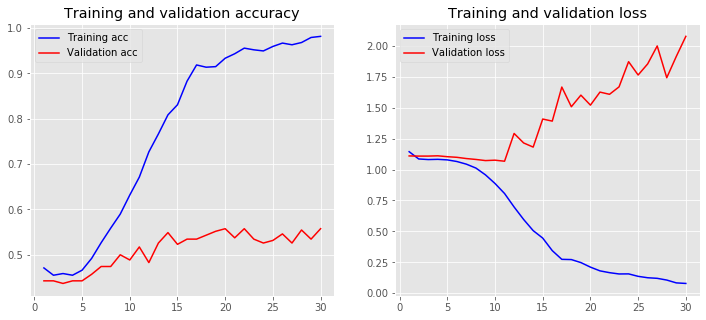

In [35]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
plot_history(history)

In [36]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [37]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix('./glove.6B/glove.6B.50d.txt',tokenizer.word_index, embedding_dim)

In [38]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.4903581267217631

In [39]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 50)            54450     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 200)               10200     
_________________________________________________________________
dense_14 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 804       
Total params: 105,654
Trainable params: 51,204
Non-trainable params: 54,450
_________________________________________________________________


In [40]:
history = model.fit(X_train_vec, y_train, epochs=30, verbose=2, validation_data=(X_test_vec, y_test), batch_size=10)

Train on 809 samples, validate on 348 samples
Epoch 1/30
 - 1s - loss: 1.1125 - acc: 0.4524 - val_loss: 1.1155 - val_acc: 0.4224
Epoch 2/30
 - 0s - loss: 1.0643 - acc: 0.4759 - val_loss: 1.1197 - val_acc: 0.4454
Epoch 3/30
 - 0s - loss: 1.0368 - acc: 0.4870 - val_loss: 1.1214 - val_acc: 0.4626
Epoch 4/30
 - 0s - loss: 1.0208 - acc: 0.5006 - val_loss: 1.0869 - val_acc: 0.4713
Epoch 5/30
 - 0s - loss: 0.9966 - acc: 0.5043 - val_loss: 1.1048 - val_acc: 0.4598
Epoch 6/30
 - 0s - loss: 0.9971 - acc: 0.5241 - val_loss: 1.1094 - val_acc: 0.4856
Epoch 7/30
 - 0s - loss: 0.9862 - acc: 0.5290 - val_loss: 1.0873 - val_acc: 0.4856
Epoch 8/30
 - 0s - loss: 0.9665 - acc: 0.5352 - val_loss: 1.1105 - val_acc: 0.4914
Epoch 9/30
 - 0s - loss: 0.9552 - acc: 0.5525 - val_loss: 1.0847 - val_acc: 0.4828
Epoch 10/30
 - 0s - loss: 0.9563 - acc: 0.5773 - val_loss: 1.1808 - val_acc: 0.4828
Epoch 11/30
 - 0s - loss: 0.9334 - acc: 0.5550 - val_loss: 1.1252 - val_acc: 0.4828
Epoch 12/30
 - 0s - loss: 0.9302 - acc:

In [41]:
loss, accuracy = model.evaluate(X_train_vec, y_train, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  0.9534837383274979           Accuracy:  0.5735475897641648


In [42]:
loss, accuracy = model.evaluate(X_test_vec, y_test, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  1.4842384409630436           Accuracy:  0.47126436781609193


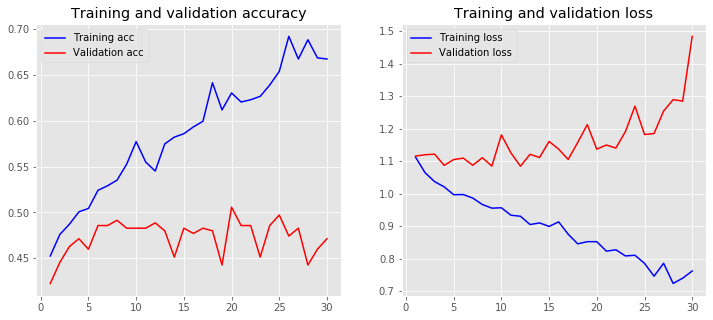

In [43]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
plot_history(history)

In [44]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 50)            54450     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 50)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 200)               10200     
_________________________________________________________________
dense_17 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 804       
Total params: 105,654
Trainable params: 105,654
Non-trainable params: 0
_________________________________________________________________


In [45]:
history = model.fit(X_train_vec, y_train, epochs=30, verbose=2, validation_data=(X_test_vec, y_test), batch_size=10)

Train on 809 samples, validate on 348 samples
Epoch 1/30
 - 1s - loss: 1.1202 - acc: 0.4413 - val_loss: 1.1047 - val_acc: 0.4598
Epoch 2/30
 - 0s - loss: 1.0790 - acc: 0.4561 - val_loss: 1.1011 - val_acc: 0.4310
Epoch 3/30
 - 0s - loss: 1.0430 - acc: 0.5130 - val_loss: 1.1142 - val_acc: 0.4598
Epoch 4/30
 - 0s - loss: 1.0200 - acc: 0.5130 - val_loss: 1.1008 - val_acc: 0.4655
Epoch 5/30
 - 0s - loss: 1.0034 - acc: 0.5142 - val_loss: 1.1370 - val_acc: 0.4856
Epoch 6/30
 - 0s - loss: 0.9920 - acc: 0.5167 - val_loss: 1.1840 - val_acc: 0.4454
Epoch 7/30
 - 0s - loss: 0.9721 - acc: 0.5315 - val_loss: 1.0811 - val_acc: 0.4684
Epoch 8/30
 - 0s - loss: 0.9555 - acc: 0.5426 - val_loss: 1.2050 - val_acc: 0.4713
Epoch 9/30
 - 0s - loss: 0.9308 - acc: 0.5723 - val_loss: 1.1881 - val_acc: 0.4569
Epoch 10/30
 - 0s - loss: 0.9160 - acc: 0.5674 - val_loss: 1.1435 - val_acc: 0.4943
Epoch 11/30
 - 0s - loss: 0.8849 - acc: 0.5871 - val_loss: 1.2211 - val_acc: 0.4655
Epoch 12/30
 - 0s - loss: 0.8631 - acc:

In [46]:
loss, accuracy = model.evaluate(X_train_vec, y_train, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  0.2655504280321383           Accuracy:  0.9147095180707161


In [47]:
loss, accuracy = model.evaluate(X_test_vec, y_test, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  1.6848784644028236           Accuracy:  0.557471265052927


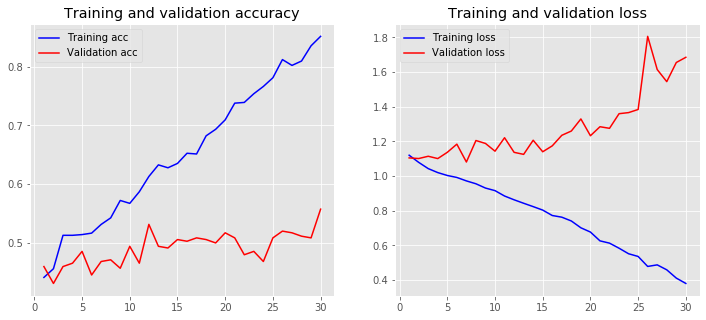

In [48]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
plot_history(history)

In [49]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(100, 10, activation='relu', input_shape=(50, 1000)))
#model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(128,activation='relu'))
#model.add(layers.GlobalMaxPooling1D())
model.add(layers.Conv1D(128, 5))
#model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(4, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 50, 50)            54450     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 41, 100)           50100     
_________________________________________________________________
dense_19 (Dense)             (None, 41, 128)           12928     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 37, 128)           82048     
_________________________________________________________________
dense_20 (Dense)             (None, 37, 100)           12900     
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 100)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 404       
Total para

In [50]:
history = model.fit(X_train_vec, y_train, epochs=10, verbose=2, validation_data=(X_test_vec, y_test), batch_size=10)

Train on 809 samples, validate on 348 samples
Epoch 1/10
 - 2s - loss: 1.2632 - acc: 0.4400 - val_loss: 1.1911 - val_acc: 0.4425
Epoch 2/10
 - 1s - loss: 1.1345 - acc: 0.4710 - val_loss: 1.1296 - val_acc: 0.4425
Epoch 3/10
 - 1s - loss: 1.0934 - acc: 0.4710 - val_loss: 1.1219 - val_acc: 0.4425
Epoch 4/10
 - 1s - loss: 1.0867 - acc: 0.4710 - val_loss: 1.1126 - val_acc: 0.4425
Epoch 5/10
 - 1s - loss: 1.0833 - acc: 0.4685 - val_loss: 1.1097 - val_acc: 0.4425
Epoch 6/10
 - 1s - loss: 1.0836 - acc: 0.4710 - val_loss: 1.1085 - val_acc: 0.4425
Epoch 7/10
 - 1s - loss: 1.0830 - acc: 0.4710 - val_loss: 1.1086 - val_acc: 0.4425
Epoch 8/10
 - 1s - loss: 1.0821 - acc: 0.4623 - val_loss: 1.1110 - val_acc: 0.4425
Epoch 9/10
 - 1s - loss: 1.0833 - acc: 0.4710 - val_loss: 1.1101 - val_acc: 0.4425
Epoch 10/10
 - 1s - loss: 1.0820 - acc: 0.4710 - val_loss: 1.1143 - val_acc: 0.4425


In [51]:
loss, accuracy = model.evaluate(X_train_vec, y_train, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  1.0803488684525744           Accuracy:  0.47095179248357144


In [52]:
loss, accuracy = model.evaluate(X_test_vec, y_test, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  1.1142684632334217           Accuracy:  0.44252873460451764


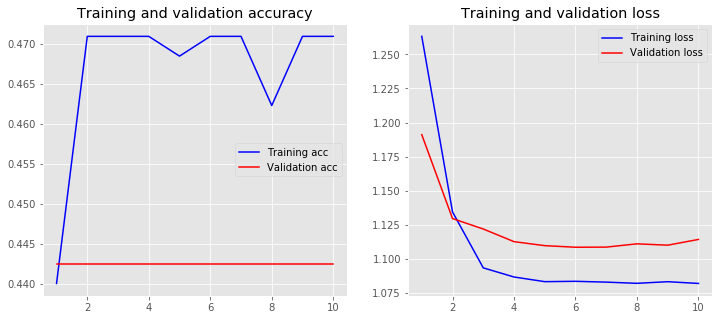

In [53]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
plot_history(history)

In [54]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(200, activation='relu'))
    model.add(layers.Dense(200, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer='sgd',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [55]:
param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7],
                  vocab_size=[5000], 
                  embedding_dim=[50],
                  maxlen=[50])

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

epochs=10
model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=10, verbose=2)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(X_train_vec, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/10
 - 1s - loss: 1.3199 - acc: 0.4356
Epoch 2/10
 - 0s - loss: 1.2137 - acc: 0.4703
Epoch 3/10
 - 0s - loss: 1.1523 - acc: 0.4703
Epoch 4/10
 - 0s - loss: 1.1178 - acc: 0.4703
Epoch 5/10
 - 0s - loss: 1.1005 - acc: 0.4703
Epoch 6/10
 - 0s - loss: 1.0913 - acc: 0.4703
Epoch 7/10
 - 0s - loss: 1.0871 - acc: 0.4703
Epoch 8/10
 - 0s - loss: 1.0839 - acc: 0.4703
Epoch 9/10
 - 1s - loss: 1.0830 - acc: 0.4703
Epoch 10/10
 - 0s - loss: 1.0816 - acc: 0.4703
Epoch 1/10
 - 1s - loss: 1.3003 - acc: 0.4662
Epoch 2/10
 - 1s - loss: 1.1882 - acc: 0.4827
Epoch 3/10
 - 0s - loss: 1.1331 - acc: 0.4827
Epoch 4/10
 - 1s - loss: 1.1070 - acc: 0.4827
Epoch 5/10
 - 1s - loss: 1.0947 - acc: 0.4827
Epoch 6/10
 - 1s - loss: 1.0875 - acc: 0.4827
Epoch 7/10
 - 0s - loss: 1.0832 - acc: 0.4827
Epoch 8/10
 - 1s - loss: 1.0803 - acc: 0.4827
Epoch 9/10
 - 0s - loss: 1.0772 - acc: 0.4827
Epoch 10/10
 - 1s - loss: 1.0761 - acc: 0.4827
Epoch 1/10
 - 2s - loss: 1.3215 - acc: 0.4662
Epoch 2/10
 - 1s - loss: 1.2256 

Epoch 9/10
 - 0s - loss: 1.0776 - acc: 0.4827
Epoch 10/10
 - 0s - loss: 1.0768 - acc: 0.4827
Epoch 1/10
 - 2s - loss: 1.3078 - acc: 0.4728
Epoch 2/10
 - 0s - loss: 1.2085 - acc: 0.4745
Epoch 3/10
 - 0s - loss: 1.1513 - acc: 0.4745
Epoch 4/10
 - 0s - loss: 1.1210 - acc: 0.4745
Epoch 5/10
 - 0s - loss: 1.1056 - acc: 0.4745
Epoch 6/10
 - 0s - loss: 1.0977 - acc: 0.4745
Epoch 7/10
 - 0s - loss: 1.0933 - acc: 0.4745
Epoch 8/10
 - 0s - loss: 1.0904 - acc: 0.4745
Epoch 9/10
 - 0s - loss: 1.0891 - acc: 0.4745
Epoch 10/10
 - 0s - loss: 1.0877 - acc: 0.4745
Epoch 1/10
 - 2s - loss: 1.3188 - acc: 0.4300
Epoch 2/10
 - 0s - loss: 1.2190 - acc: 0.4563
Epoch 3/10
 - 0s - loss: 1.1583 - acc: 0.4563
Epoch 4/10
 - 0s - loss: 1.1240 - acc: 0.4563
Epoch 5/10
 - 0s - loss: 1.1065 - acc: 0.4563
Epoch 6/10
 - 0s - loss: 1.0978 - acc: 0.4563
Epoch 7/10
 - 0s - loss: 1.0926 - acc: 0.4563
Epoch 8/10
 - 0s - loss: 1.0898 - acc: 0.4563
Epoch 9/10
 - 0s - loss: 1.0871 - acc: 0.4563
Epoch 10/10
 - 0s - loss: 1.0867

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.9min finished


Epoch 1/10
 - 2s - loss: 1.2965 - acc: 0.4475
Epoch 2/10
 - 1s - loss: 1.1779 - acc: 0.4710
Epoch 3/10
 - 1s - loss: 1.1239 - acc: 0.4710
Epoch 4/10
 - 1s - loss: 1.1013 - acc: 0.4710
Epoch 5/10
 - 1s - loss: 1.0914 - acc: 0.4710
Epoch 6/10
 - 1s - loss: 1.0865 - acc: 0.4710
Epoch 7/10
 - 1s - loss: 1.0838 - acc: 0.4710
Epoch 8/10
 - 1s - loss: 1.0817 - acc: 0.4710
Epoch 9/10
 - 1s - loss: 1.0810 - acc: 0.4710
Epoch 10/10
 - 1s - loss: 1.0801 - acc: 0.4710


In [57]:
# Evaluate testing set
test_accuracy = grid.score(X_test_vec, y_test)
test_accuracy

0.44252874333968106

In [58]:
pip install -q tfds-nightly

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4)
])

In [88]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_vec, y_train, epochs=30, verbose=2, validation_data=(X_test_vec, y_test), batch_size=10)

Train on 809 samples, validate on 348 samples
Epoch 1/30
809/809 - 57s - loss: 1.3557 - acc: 0.4487 - val_loss: 1.2904 - val_acc: 0.4425
Epoch 2/30
809/809 - 31s - loss: 1.2616 - acc: 0.4710 - val_loss: 1.2735 - val_acc: 0.4425
Epoch 3/30
809/809 - 35s - loss: 1.2452 - acc: 0.4710 - val_loss: 1.2535 - val_acc: 0.4425
Epoch 4/30
809/809 - 31s - loss: 1.2399 - acc: 0.4697 - val_loss: 1.2562 - val_acc: 0.4425
Epoch 5/30
809/809 - 33s - loss: 1.2369 - acc: 0.4710 - val_loss: 1.2514 - val_acc: 0.4425
Epoch 6/30
809/809 - 34s - loss: 1.2319 - acc: 0.4845 - val_loss: 1.2628 - val_acc: 0.4425
Epoch 7/30
809/809 - 33s - loss: 1.2366 - acc: 0.4784 - val_loss: 1.2546 - val_acc: 0.4454
Epoch 8/30
809/809 - 33s - loss: 1.2145 - acc: 0.5216 - val_loss: 1.2408 - val_acc: 0.4626
Epoch 9/30
809/809 - 34s - loss: 1.1508 - acc: 0.6168 - val_loss: 1.2418 - val_acc: 0.4885
Epoch 10/30
809/809 - 35s - loss: 1.1443 - acc: 0.5970 - val_loss: 1.2478 - val_acc: 0.4770
Epoch 11/30
809/809 - 35s - loss: 1.1032 - 

In [62]:
loss, accuracy = model.evaluate(X_train_vec, y_train, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  0.2746274030694855           Accuracy:  0.8998764


In [63]:
loss, accuracy = model.evaluate(X_test_vec, y_test, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  1.800597949959766           Accuracy:  0.5804598


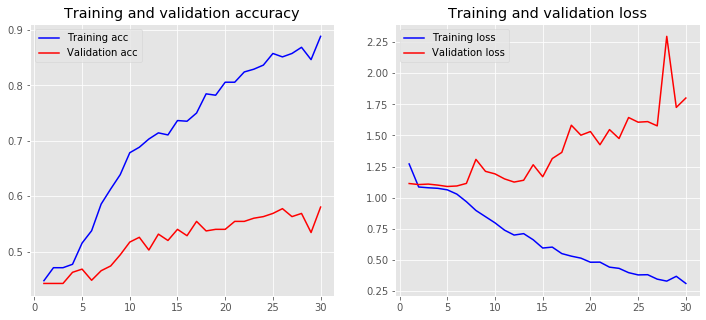

In [64]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
plot_history(history)

In [71]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4)
])

In [72]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [73]:
history = model.fit(X_train_vec, y_train, epochs=30, verbose=2, validation_data=(X_test_vec, y_test), batch_size=10)

Train on 809 samples, validate on 348 samples
Epoch 1/30
809/809 - 36s - loss: 1.2576 - acc: 0.4326 - val_loss: 1.1421 - val_acc: 0.4425
Epoch 2/30
809/809 - 25s - loss: 1.1391 - acc: 0.4512 - val_loss: 1.1301 - val_acc: 0.4425
Epoch 3/30
809/809 - 25s - loss: 1.1307 - acc: 0.4487 - val_loss: 1.1203 - val_acc: 0.4425
Epoch 4/30
809/809 - 25s - loss: 1.1201 - acc: 0.4277 - val_loss: 1.1165 - val_acc: 0.4425
Epoch 5/30
809/809 - 26s - loss: 1.1194 - acc: 0.4574 - val_loss: 1.1149 - val_acc: 0.4425
Epoch 6/30
809/809 - 29s - loss: 1.1045 - acc: 0.4549 - val_loss: 1.1184 - val_acc: 0.4425
Epoch 7/30
809/809 - 29s - loss: 1.1055 - acc: 0.4660 - val_loss: 1.1095 - val_acc: 0.4425
Epoch 8/30
809/809 - 35s - loss: 1.0932 - acc: 0.4771 - val_loss: 1.0889 - val_acc: 0.4598
Epoch 9/30
809/809 - 35s - loss: 1.0621 - acc: 0.5179 - val_loss: 1.0754 - val_acc: 0.4799
Epoch 10/30
809/809 - 37s - loss: 0.9827 - acc: 0.5600 - val_loss: 1.0696 - val_acc: 0.4828
Epoch 11/30
809/809 - 38s - loss: 0.9101 - 

In [74]:
loss, accuracy = model.evaluate(X_train_vec, y_train, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  0.21439850267727384           Accuracy:  0.9233622


In [75]:
loss, accuracy = model.evaluate(X_test_vec, y_test, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  1.6605945373403614           Accuracy:  0.545977


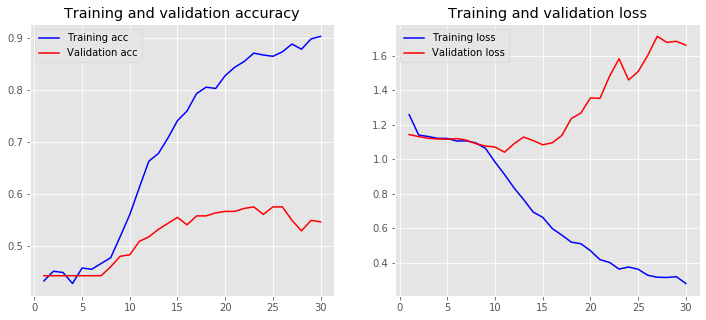

In [76]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
plot_history(history)

In [83]:
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=maxlen, 
                    #embeddings_initializer = Constant(embedding_matrix),
#                    weights=[embedding_matrix], 
                    trainable=False))
model.add(Dropout(0.2))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_vec, y_train,
          epochs=25,
          validation_data=(X_test_vec, y_test))
print(model.summary())

Train on 809 samples, validate on 348 samples
Epoch 1/25
809/809 [==============================] - 8s 10ms/step - loss: 1.2087 - acc: 0.4611 - val_loss: 1.1188 - val_acc: 0.4425
Epoch 2/25
809/809 [==============================] - 2s 2ms/step - loss: 1.0899 - acc: 0.4586 - val_loss: 1.1097 - val_acc: 0.4425
Epoch 3/25
809/809 [==============================] - 1s 1ms/step - loss: 1.0838 - acc: 0.4710 - val_loss: 1.1121 - val_acc: 0.4425
Epoch 4/25
809/809 [==============================] - 1s 2ms/step - loss: 1.0801 - acc: 0.4710 - val_loss: 1.1109 - val_acc: 0.4425
Epoch 5/25
809/809 [==============================] - 1s 2ms/step - loss: 1.0766 - acc: 0.4734 - val_loss: 1.1129 - val_acc: 0.4425
Epoch 6/25
809/809 [==============================] - 1s 2ms/step - loss: 1.0766 - acc: 0.4784 - val_loss: 1.1183 - val_acc: 0.4339
Epoch 7/25
809/809 [==============================] - 1s 1ms/step - loss: 1.0705 - acc: 0.4808 - val_loss: 1.1118 - val_acc: 0.4454
Epoch 8/25
809/809 [=========

In [1]:
y_pred = model.predict(X_test_vec)

NameError: name 'model' is not defined